In [ ]:
import pandas as pd
import numpy as np
from numpy import unique
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
dt=pd.read_csv('data.csv')

In [ ]:
dt

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,1,4,3,5,4,3,1,2,1,5,5,3,5,3,4,5,4,4,4,4,5,5,1,5,1,5,1,1,5,5,3,2,5,3,3,3,4,3,4,4,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,2,3,2,3,2,3,2,4,4,4,2,4,2,4,3,2,2,2,2,2,2,3,2,4,2,4,2,3,3,3,3,3,4,2,2,4,4,2,3,3,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,2,5,4,5,5,5,1,2,1,5,5,1,5,1,5,5,5,5,5,5,4,3,5,2,5,5,2,4,1,3,2,5,5,5,4,5,1,4,1,5,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,1,4,2,3,2,4,1,3,4,5,4,3,5,2,4,4,4,4,4,4,3,3,2,4,2,4,2,5,4,3,5,3,5,2,4,2,5,1,3,5,3,2,5,3,4,1,5,3,5,5


In [ ]:
dt.shape

(19719, 56)

In [ ]:
dt.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'E1', 'E2', 'E3',
       'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10'],
      dtype='object')

In [ ]:
dt.describe()

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
count,19719.000000,1.971900e+04,19719.000000,19719.000000,19719.000000,19719.00000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000,19719.000000
mean,5.324205,5.076703e+04,1.365130,1.616918,1.130128,1.95228,2.628937,2.759724,3.416755,3.152036,3.432223,2.452609,2.867285,3.376490,3.094275,3.585324,3.262082,3.234596,3.842690,2.756276,2.951722,2.980374,3.151935,2.803235,3.135250,2.833764,2.312085,3.926568,2.162736,4.030073,2.165982,3.896090,2.160657,3.766469,3.944723,3.682337,3.318475,2.978802,3.983011,2.654242,2.700390,2.922866,3.646686,2.481363,3.224454,3.637203,3.692479,2.149653,4.126122,2.079416,3.873016,1.794766,4.072975,3.208023,4.133577,4.004767
std,4.019064,7.121272e+06,0.488796,0.499122,0.413663,1.50477,1.232565,1.313818,1.236820,1.222822,1.282003,1.241616,1.431814,1.266396,1.396490,1.304571,1.308169,1.177018,1.138854,1.220964,1.272889,1.320437,1.299910,1.350648,1.298573,1.313036,1.369347,1.078510,1.216013,1.045403,1.141783,1.130453,1.132133,1.035959,1.085496,1.052679,1.099567,1.367266,1.003021,1.243191,1.249686,1.399246,1.152740,1.132936,1.246245,1.012663,1.116302,1.135227,1.006806,1.109751,0.939655,1.068513,0.923595,1.258921,0.982868,0.983729
min,0.000000,1.300000e+01,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.800000e+01,1.000000,1.000000,1.000000,1.00000,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,3.000000,1.000000,4.000000,1.000000,3.000000,1.000000,4.000000,2.000000,4.000000,3.000000
50%,3.000000,2.200000e+01,1.000000,2.000000,1.000000,1.00000,3.000000,3.000000,4.000000,3.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,2.000000,3.000000,4.000000,4.000000,2.000000,4.000000,2.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000
75%,8.000000,3.100000e+01,2.000000,2.000000,1.000000,2.00000,4.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,3.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,3.000000,4.000000,4.000000,5.000000,3.000000,5.000000,3.000000,5.000000,2.000000,5.000000,4.000000,5.000000,5.000000
max,13.00

In [ ]:
dt.isnull().sum()

race      0
age       0
engnat    0
gender    0
hand      0
source    0
E1        0
E2        0
E3        0
E4        0
E5        0
E6        0
E7        0
E8        0
E9        0
E10       0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
A1        0
A2        0
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
C1        0
C2        0
C3        0
C4        0
C5        0
C6        0
C7        0
C8        0
C9        0
C10       0
O1        0
O2        0
O3        0
O4        0
O5        0
O6        0
O7        0
O8        0
O9        0
O10       0
dtype: int64

In [ ]:
dt2 = dt.copy()

In [ ]:
X = dt2.values
X.shape

(19719, 56)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # create object
scaler.fit(X) # calculate means and standard deviation
X_scaled = scaler.fit_transform(X) #tranform values


In [ ]:
from sklearn.decomposition import PCA
pca_56 = PCA(n_components=56,random_state=2020)
pca_56.fit(X_scaled)
X_pca_56 = pca_56.transform(X_scaled)


In [ ]:
pca_56.explained_variance_ratio_ * 100

array([14.41121519,  8.34938895,  6.80622076,  6.47828111,  4.96635221,
        3.22279929,  2.53547458,  2.15789968,  1.85647425,  1.83057646,
        1.76474196,  1.74521479,  1.70030135,  1.62214497,  1.56904291,
        1.54250546,  1.51520153,  1.50111606,  1.46013908,  1.39535963,
        1.31925159,  1.2832214 ,  1.2550106 ,  1.23406422,  1.17224979,
        1.16556583,  1.11385463,  1.09345271,  1.05969035,  1.04223983,
        1.02144668,  0.99567993,  0.95396374,  0.93566806,  0.93213997,
        0.90877773,  0.88719389,  0.87310955,  0.86272091,  0.85611721,
        0.79955126,  0.79022856,  0.77526238,  0.75123618,  0.742707  ,
        0.7182609 ,  0.70553652,  0.67710547,  0.65796964,  0.64734909,
        0.61791382,  0.61336203,  0.58017856,  0.57636369,  0.55554917,
        0.39555687])

In [ ]:
print("Variance explained by all 56 principal components =",
sum(pca_56.explained_variance_ratio_ * 100))

Variance explained by all 56 principal components = 99.99999999999999


In [ ]:
np.cumsum(pca_56.explained_variance_ratio_*100)

array([ 14.41121519,  22.76060414,  29.56682491,  36.04510601,
        41.01145823,  44.23425752,  46.7697321 ,  48.92763178,
        50.78410602,  52.61468248,  54.37942445,  56.12463923,
        57.82494059,  59.44708556,  61.01612846,  62.55863393,
        64.07383545,  65.57495151,  67.0350906 ,  68.43045023,
        69.74970182,  71.03292323,  72.28793383,  73.52199804,
        74.69424784,  75.85981367,  76.9736683 ,  78.06712101,
        79.12681136,  80.16905118,  81.19049787,  82.1861778 ,
        83.14014154,  84.0758096 ,  85.00794958,  85.9167273 ,
        86.8039212 ,  87.67703075,  88.53975166,  89.39586887,
        90.19542012,  90.98564868,  91.76091106,  92.51214724,
        93.25485424,  93.97311514,  94.67865166,  95.35575713,
        96.01372677,  96.66107586,  97.27898968,  97.89235171,
        98.47253027,  99.04889395,  99.60444313, 100.        ])

Text(0, 0.5, 'Explained Variance')

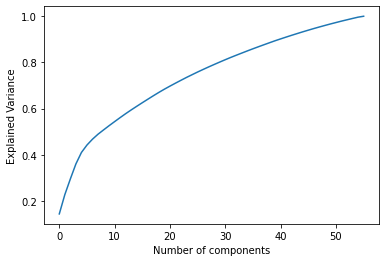

In [ ]:
plt.plot(np.cumsum(pca_56.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')


In [ ]:
np.cumsum(pca_56.explained_variance_ratio_*100)[46]

94.67865165915815

In [ ]:
pca_94 = PCA(n_components=0.94,random_state=2020)
pca_94.fit(X_scaled)
X_pca_94 = pca_94.transform(X_scaled)

In [ ]:
X_pca_94.shape

(19719, 47)

In [ ]:
scaling_o = pd.DataFrame(X_scaled)
scaling_o

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55
0,-0.578310,-0.007122,-0.747017,-1.236038,-0.314583,-0.632857,1.112394,-0.578272,1.280125,-0.942137,1.222943,-1.169964,0.791125,-0.297300,1.364688,-1.981792,-1.729240,1.499933,-1.618062,1.837713,-1.533339,-1.499825,-1.655491,-1.335123,-1.644347,-1.396619,-0.958207,0.995316,-0.956211,0.927826,-0.145375,-0.792703,-1.025221,1.190744,0.050924,1.251756,0.619829,-1.447306,1.013952,-1.330676,1.840196,-1.374251,0.306507,-1.307577,0.622322,1.345790,0.275489,-1.012733,-1.118537,-0.972690,1.199390,-0.743825,-0.079014,-0.959594,0.881548,1.011720
1,1.909895,-0.007123,-0.747017,0.767532,-0.314583,-0.632857,-0.510279,-0.578272,-0.336966,-0.124335,-0.337155,0.440881,-1.304173,1.282025,-1.499708,1.084427,-0.964794,-0.199319,0.138134,-0.619424,0.037929,0.772208,-0.116884,-0.594719,-0.874251,0.888220,-0.958207,-0.859140,0.688549,-0.028767,1.606316,0.091921,-0.141910,-0.739883,0.050924,-0.648207,0.619829,-1.447306,-0.980076,-0.526274,0.239754,-1.374251,1.174028,-1.307577,0.622322,0.358270,-0.620349,0.749074,-1.118537,0.829563,-1.993353,1.127983,-1.161768,-1.753946,-1.153365,-2.037978
2,-1.075951,-0.007127,1.298876,0.767532,-0.314583,-0.632857,1.923730,-1.339431,-1.954057,0.693466,1.222943,-1.169964,-1.304173,1.282025,1.364688,-1.981792,1.328545,-1.898571,1.016232,1.837713,1.609197,1.529552,1.421723,1.626494,1.436036,1.649833,1.962968,-2.713597,2.333310,0.927826,-1.021220,0.976545,-1.025221,1.190744,0.972185,1.251756,0.619829,-1.447306,1.013952,-1.330676,1.840196,-1.374251,1.174028,-1.307577,1.424753,1.345790,0.275489,2.510881,0.867992,-0.972690,1.199390,-0.743825,1.003739,1.423460,0.881548,1.011720
3,-0.578310,-0.007126,1.298876,0.767532,-0.314583,-0.632857,-0.510279,1.705208,-1.145511,0.693466,-0.337155,1.246303,0.092692,0.492362,0.648589,1.084427,1.328545,0.650307,0.138134,-0.619424,0.823563,1.529552,1.421723,1.626494,0.665940,1.649833,-0.227914,0.995316,1.510929,-0.028767,0.730471,0.976545,0.741401,0.225431,0.050924,-0.648207,-0.289644,0.015504,0.016938,1.886933,-1.360688,0.769815,1.174028,1.340478,-0.982539,-0.629251,0.275489,0.749074,0.867992,-0.071564,0.135143,0.192079,1.003739,-0.959594,0.881548,1.011720
4,1.412254,-0.007126,1.298876,0.767532,-0.314583,0.031714,0.301057,-1.339431,-0.336966,-0.124335,-0.337155,-1.169964,0.092692,-1.876624,-0.067510,1.084427,-0.200348,-0.199319,-0.739964,1.018667,0.037929,0.014863,-0.116884,0.145685,-0.104156,0.888220,1.962968,0.995316,0.688549,0.927826,-1.021220,0.976545,-1.025221,1.190744,0.972185,1.251756,-0.289644,-1.447306,1.013952,0.278128,0.239754,-1.374251,-2.296054,0.457793,-0.180108,-0.629251,-0.620349,-1.012733,-3.105067,-0.972690,-0.929105,-0.743825,-1.161768,-1.753946,0.881548,-1.021412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,1.412254,-0.007127,-0.747017,0.767532,-0.314583,0.031714,-1.321616,0.944048,-0.336966,1.511267,0.442894,0.440881,-1.304173,-1.086962,-1.499708,1.084427,1.328545,-0.199319,1.016232,0.199621,0.823563,1.529552,0.652420,0.886090,0.665940,0.888220,1.962968,0.995316,-0.956211,0.927826,-1.021220,0.976545,-1.025221,-2.670509,0.972185,1.251756,-0.289644,-0.715901,1.013952,0.278128,0.239754,0.055127,0.306507,0.457793,0.622322,0.358270,-2.412024,0.749074,0.867992,0.829563,0.135143,-0.743825,-0.079014,-0.959594,0.881548,-1.021412
19715,-0.578310,-0.007124,-0.747017,0.767532,-0.314583,0.031714,-0.510279,0.182888,-1.145511,-0.124335,-1.117204,0.440881,-0.605740,0.492362,0.648589,0.317872,-0.964794,0.650307,-1.618062,1.018667,0.037929,-0.742481,-0.886187,-0.594719,-0.874251,-0.635006,-0.227914,-0.859140,-0.133831,-0.028767,-0.145375,0.091921,-0.141910,-0.739883,-0.870337,-0.648207,-0.289644,0.015504,0.016938,-0.526274,-0.560467,0.769815,0.306

In [ ]:
df_new = pd.DataFrame(X_pca_94, columns = [ 'pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20','pc21','pc22','pc23','pc24','pc25','pc26','pc27','pc28','pc29','pc30','pc31','pc32','pc33','pc34','pc35','pc36','pc37','pc38','pc39','pc40','pc41','pc42','pc43','pc44','pc45','pc46' ,'pc47' ])
df_new

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32,pc33,pc34,pc35,pc36,pc37,pc38,pc39,pc40,pc41,pc42,pc43,pc44,pc45,pc46,pc47
0,-7.171055,2.604335,-0.444515,-0.196014,0.029452,-0.115250,0.314560,-0.338345,-0.228079,-0.717244,-0.188463,1.211792,-0.380122,0.203915,0.416190,-1.639938,0.052919,-0.064703,-0.035082,0.116989,-0.939260,0.455035,-0.710258,0.170196,0.148584,1.095832,0.716683,-0.072071,0.057436,-0.487045,0.004407,0.058344,0.448740,-0.348113,0.420832,0.102208,0.619241,-0.184262,0.579390,-0.420611,0.226310,-0.364633,-0.766408,0.542078,0.009917,-0.779285,0.105598
1,2.001327,2.326591,-3.181163,2.554047,0.806052,1.495760,0.728152,0.362262,0.250346,0.222422,-0.129952,-0.331074,-0.618272,0.634835,-0.779158,-0.733282,0.785391,1.418862,-1.276157,-0.181787,1.016464,-0.814215,-0.684219,-0.731594,-0.182885,-0.622563,0.045633,-0.011195,-0.621425,0.659800,-0.054325,-0.907009,0.163775,0.750124,-0.304507,0.892651,-0.231175,-0.802326,-0.450689,-0.360321,-0.638036,-0.044020,-0.572411,0.367165,-0.404771,0.626735,0.939648
2,-0.294066,-3.014599,-2.127791,-2.774936,4.996312,-1.180164,0.291153,-0.177510,0.066226,0.811219,-1.653008,0.810292,1.060079,0.437207,-0.960024,-1.165677,-0.564882,-0.301123,1.350574,0.513449,-0.373891,2.589420,-1.530201,-1.935737,-0.861147,-0.488284,0.523253,-0.260777,0.920118,-0.098332,0.179926,0.688948,-1.291006,1.125200,-0.484367,-1.165745,0.115113,1.530144,-0.582999,0.604078,-1.053072,1.763292,-1.180233,-0.055395,2.551801,-1.130891,-0.890249
3,3.745796,-2.552083,0.430417,-1.419078,-0.107445,-1.874200,-0.826470,-0.113084,-0.057217,-0.759940,0.280261,0.604293,-0.502507,0.708498,-0.424092,-0.395996,0.248111,-0.559102,-0.369739,0.798250,-0.003961,-0.442255,1.604735,0.509713,-0.050780,-0.011449,-0.169208,-1.467055,0.739271,0.231287,-0.264970,-0.954643,0.744183,0.203302,-1.421594,-0.326311,0.292112,-1.222771,-0.547124,-0.528428,-0.111708,0.073975,-0.665225,-0.285432,0.583162,0.287645,-1.055193
4,-1.000301,-1.161144,-1.231049,2.363144,-0.534577,-1.316551,2.379139,-1.409444,0.499406,-0.530792,1.572970,-0.702963,-0.620330,-0.835523,-1.129940,-1.038762,-0.415591,-0.262542,0.336121,1.628308,-0.547865,2.483571,-1.245087,0.933237,-1.000308,-1.343343,1.553536,1.139650,-0.554739,-0.774131,-0.408866,0.167151,-0.704183,-0.228247,0.568527,0.149953,-1.511774,-0.132187,-0.535313,-1.535108,0.854043,-0.247183,-0.898962,1.966223,-0.504564,0.153666,-0.070340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,2.307479,-1.743439,-3.114113,0.150085,0.446235,-2.292042,0.920093,1.228451,-0.334385,0.407168,0.286092,-0.091257,-1.315318,-0.339686,-0.150539,0.147532,-0.342505,-0.377337,0.136221,0.542344,-0.976831,-0.652889,0.621365,1.087974,-0.363583,-0.455380,0.045126,1.538985,-0.146443,2.109491,-0.440413,1.512348,0.970294,0.827685,2.051963,-0.486512,-1.882256,0.167341,0.132809,0.471511,-0.126838,-0.538023,0.276569,0.870552,-0.244379,0.272800,-0.286176
19715,0.705284,2.729628,-0.243790,2.486355,-1.513760,0.644859,0.033087,0.347914,-0.445165,0.697224,0.608430,-0.121310,0.166752,0.037797,0.868733,-1.316632,0.857728,-1.062859,-0.229578,1.160937,0.432006,-0.378977,0.342415,0.082142,0.050598,-0.010117,0.111275,-0.296431,0.812490,0.089064,-0.139855,0.122962,-0.674898,0.653935,0.355776,-0.054484,-0.277898,-0.443713,-0.253855,0.597103,-0.474433,0.927482,-0.456689,-0.103389,0.178819,-0.537872,-0.232989
19716,6.131860,-1.818347,2.026493,-0.267486,1.624710,-0.764657,-1.259071,-1.265579,-0.307479,-0.473224,0.367458,0.337663,-0.532498,-0.308597,1.079115,1.598665,-0.620633,0.785441,0.681715,-1.776816,-1.363636,0.324331,-2.472263,0.954203,-0.510252,0.864626,2.847416,0.378586,0.321734,-0.957557,-0.723175,-0.624353,0.804127,-3.120960,-1.908017,-0.532053,-1.592396,0.362961,0.219700,0.081490,2.544426,0.100993,-0.895214,2.37

In [ ]:
dt2.columns

Index(['race', 'age', 'engnat', 'gender', 'hand', 'source', 'E1', 'E2', 'E3',
       'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'N1', 'N2', 'N3', 'N4', 'N5',
       'N6', 'N7', 'N8', 'N9', 'N10', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7',
       'A8', 'A9', 'A10', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
       'C10', 'O1', 'O2', 'O3', 'O4', 'O5', 'O6', 'O7', 'O8', 'O9', 'O10'],
      dtype='object')

In [ ]:
df_new.columns

Index(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8', 'pc9', 'pc10',
       'pc11', 'pc12', 'pc13', 'pc14', 'pc15', 'pc16', 'pc17', 'pc18', 'pc19',
       'pc20', 'pc21', 'pc22', 'pc23', 'pc24', 'pc25', 'pc26', 'pc27', 'pc28',
       'pc29', 'pc30', 'pc31', 'pc32', 'pc33', 'pc34', 'pc35', 'pc36', 'pc37',
       'pc38', 'pc39', 'pc40', 'pc41', 'pc42', 'pc43', 'pc44', 'pc45', 'pc46',
       'pc47'],
      dtype='object')

In [ ]:
#@title Default title text
dt2

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5
1,13,46,1,2,1,1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2
2,1,14,2,2,1,1,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5
3,3,19,2,2,1,1,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5
4,11,25,2,2,1,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,1,4,3,5,4,3,1,2,1,5,5,3,5,3,4,5,4,4,4,4,5,5,1,5,1,5,1,1,5,5,3,2,5,3,3,3,4,3,4,4,1,3,5,3,4,1,4,2,5,3
19715,3,37,1,2,1,2,2,3,2,3,2,3,2,4,4,4,2,4,2,4,3,2,2,2,2,2,2,3,2,4,2,4,2,3,3,3,3,3,4,2,2,4,4,2,3,3,1,2,3,2,3,3,4,2,3,3
19716,5,16,2,1,1,2,2,5,4,5,5,5,1,2,1,5,5,1,5,1,5,5,5,5,5,5,4,3,5,2,5,5,2,4,1,3,2,5,5,5,4,5,1,4,1,5,5,3,1,3,4,1,1,5,5,5
19717,12,16,1,1,1,5,1,4,2,3,2,4,1,3,4,5,4,3,5,2,4,4,4,4,4,4,3,3,2,4,2,4,2,5,4,3,5,3,5,2,4,2,5,1,3,5,3,2,5,3,4,1,5,3,5,5


In [ ]:
X= df_new.to_numpy() 
X

array([[-7.17105542,  2.60433513, -0.44451544, ...,  0.00991705,
        -0.77928545,  0.10559792],
       [ 2.00132747,  2.32659102, -3.18116297, ..., -0.40477113,
         0.62673513,  0.93964821],
       [-0.29406631, -3.01459864, -2.12779073, ...,  2.55180142,
        -1.13089086, -0.89024931],
       ...,
       [ 6.13185958, -1.81834677,  2.02649347, ..., -1.47002947,
         0.88344311,  0.11984687],
       [ 1.54237415,  0.12584665, -2.46180676, ..., -0.71986154,
         0.21830576,  0.54683653],
       [ 1.47740266,  0.06905615,  0.35891675, ...,  0.15644374,
        -0.03222353, -0.26951914]])

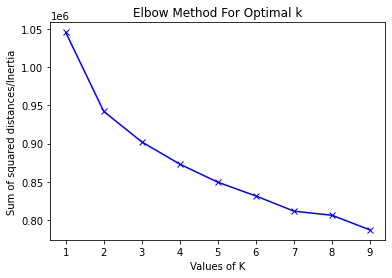

In [ ]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_new)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7ddf785d0>,
                 k=None, metric=None, model=None, timings=True)

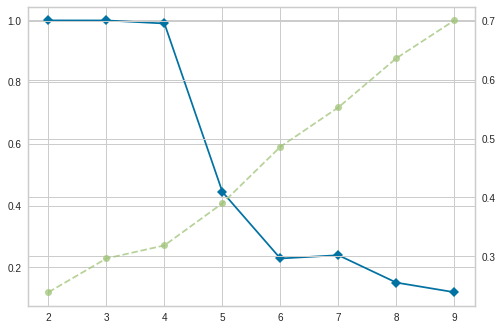

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True)
visualizer.fit(dt2)        # Fit the data to the visualizer
       # Finalize and render the figure

In [ ]:
from sklearn.cluster import MiniBatchKMeans
m = MiniBatchKMeans(n_clusters=5,max_iter = 300, batch_size=100,random_state=50)
m.fit(X)


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=300, max_no_improvement=10,
                n_clusters=5, n_init=3, random_state=50,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [ ]:
m.predict(X)

array([2, 3, 0, ..., 4, 4, 4], dtype=int32)

In [ ]:
len(m.cluster_centers_)

5

In [ ]:
dt3=dt2.copy()


In [ ]:
dt3['cluster'] = pd.DataFrame(data=m.predict(X))
dt3


,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,3,53,1,1,1,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,2
1,13,46,1,2,1,1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,3
2,1,14,2,2,1,1,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,0
3,3,19,2,2,1,1,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,0
4,11,25,2,2,1,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,1,4,3,5,4,3,1,2,1,5,5,3,5,3,4,5,4,4,4,4,5,5,1,5,1,5,1,1,5,5,3,2,5,3,3,3,4,3,4,4,1,3,5,3,4,1,4,2,5,3,3
19715,3,37,1,2,1,2,2,3,2,3,2,3,2,4,4,4,2,4,2,4,3,2,2,2,2,2,2,3,2,4,2,4,2,3,3,3,3,3,4,2,2,4,4,2,3,3,1,2,3,2,3,3,4,2,3,3,3
19716,5,16,2,1,1,2,2,5,4,5,5,5,1,2,1,5,5,1,5,1,5,5,5,5,5,5,4,3,5,2,5,5,2,4,1,3,2,5,5,5,4,5,1,4,1,5,5,3,1,3,4,1,1,5,5,5,4
19717,12,16,1,1,1,5,1,4,2,3,2,4,1,3,4,5,4,3,5,2,4,4,4,4,4,4,3,3,2,4,2,4,2,5,4,3,5,3,5,2,4,2,5,1,3,5,3,2,5,3,4,1,5,3,5,5,4


In [ ]:
c_0 = dt3[dt3.cluster==0].iloc[:,6:]
c_1 = dt3[dt3.cluster==1].iloc[:,6:]
c_2 = dt3[dt3.cluster==2].iloc[:,6:]
c_3 = dt3[dt3.cluster==3].iloc[:,6:]
c_4 = dt3[dt3.cluster==4].iloc[:,6:]

In [ ]:
c_0.reset_index(inplace = True)
c_0

,index,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,2,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,0
1,3,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,0
2,17,4,1,5,2,5,1,5,3,5,1,5,2,5,2,3,3,3,3,4,2,1,5,2,5,2,5,1,5,5,3,3,4,3,3,1,1,3,3,4,3,3,1,3,3,3,3,5,4,3,3,0
3,20,1,4,2,5,3,4,2,4,3,3,4,4,4,4,4,4,5,5,4,2,4,5,1,5,2,4,1,4,5,3,2,3,4,5,3,4,2,1,1,5,5,3,5,2,4,1,4,3,4,4,0
4,28,2,4,3,4,2,2,4,5,1,5,5,4,5,1,3,4,5,4,4,4,3,5,5,4,1,5,1,4,2,3,2,5,3,4,1,2,2,5,3,1,4,3,3,1,4,2,3,3,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4032,19693,2,1,5,1,5,1,1,1,5,5,5,1,5,5,5,5,5,5,5,3,5,2,5,5,1,5,2,1,5,2,3,5,1,5,1,5,1,5,1,1,1,4,5,1,3,4,4,1,1,5,0
4033,19696,4,1,2,1,4,1,4,2,5,4,4,3,5,2,3,3,4,4,4,5,5,5,5,3,4,4,4,2,4,3,2,2,5,2,1,3,2,4,1,3,3,1,5,1,4,1,2,3,5,5,0
4034,19697,1,1,1,4,5,2,3,4,5,3,4,1,3,2,5,4,5,2,5,2,2,3,2,4,3,5,2,5,3,2,2,2,5,5,2,4,5,2,2,2,4,2,5,1,5,1,4,3,5,5,0
4035,19705,4,2,5,2,3,1,4,2,5,3,5,3,5,1,2,4,4,4,4,5,1,5,4,5,2,4,1,5,5,4,4,3,4,2,3,2,5,3,5,5,3,1,5,1,5,1,5,3,5,5,0


In [ ]:
c_1.reset_index(inplace = True)
c_2.reset_index(inplace = True)
c_3.reset_index(inplace = True)
c_4.reset_index(inplace = True)

In [ ]:
from statistics import mean
one=[]
two=[]
three=[]
four = []
five=[]
di=[one, two,  three, four, five]
dts =[c_0,c_1, c_2, c_3, c_4 ]
for i in range(0,5):
  for k in dts[i].columns[1:-1]:
   d=[]
   d= list(dts[i][k])
   di[i].append(mean(d))



In [ ]:
len(one)

50

In [ ]:
one

[2.8298241268268516,
 2.382214515729502,
 3.369581372306168,
 3.0780282387911817,
 3.7012633143423335,
 2.1045330691107256,
 3.068119891008174,
 3.1595243993064157,
 3.39261828090166,
 3.579390636611345,
 4.089670547436215,
 2.744860044587565,
 4.491454050037157,
 2.2259103294525637,
 3.599207332177359,
 3.9068615308397323,
 4.129303938568244,
 3.863760217983651,
 3.9346049046321525,
 3.7210800099083476,
 2.098340351746346,
 4.263809759722566,
 2.550161010651474,
 4.337874659400545,
 1.8506316571711667,
 4.209066138221451,
 1.880108991825613,
 3.9712657914292793,
 4.332177359425316,
 3.7508050532573693,
 2.8902650483031955,
 3.7178597968788702,
 3.9222194699033937,
 3.5139955412434976,
 2.12434976467674,
 3.6908595491701757,
 3.402526628684667,
 2.981917265296012,
 2.8516224919494673,
 3.484022789199901,
 3.966807034926926,
 2.010899182561308,
 4.572207084468665,
 1.8241268268516224,
 4.081248451820659,
 1.4736190240277434,
 4.1018082734703984,
 3.6507307406489966,
 4.457517958880357,


In [ ]:
len(one)

47

In [ ]:
len(two) #np.asarray

47

In [ ]:
all_types = {'a':np.asarray(one), 'b': np.asarray(two), 'c' :np.asarray(three), 'd': np.asarray(four), 'e': np.asarray(five)}

In [ ]:
all_types_scores ={}
for name, personality_type in all_types.items():
    personality_trait = {}
    personality_trait['extroversion'] =  personality_type[0] - personality_type[1] + personality_type[2] - personality_type[3] + personality_type[4] - personality_type[5] + personality_type[6] - personality_type[7] + personality_type[8] - personality_type[9] 
    
    personality_trait['neuroticism'] =  personality_type[10] - personality_type[11] + personality_type[12] - personality_type[13] + personality_type[14] - personality_type[15] + personality_type[16] - personality_type[17] + personality_type[18] - personality_type[19] 
    personality_trait['agreeableness'] =  - personality_type[20] + personality_type[21] - personality_type[22] + personality_type[23] - personality_type[24] + personality_type[25] - personality_type[26] + personality_type[27] - personality_type[28] + personality_type[29] 
    personality_trait['conscientiousness'] = personality_type[30] - personality_type[31] + personality_type[32] - personality_type[33] + personality_type[34] - personality_type[35] + personality_type[36] - personality_type[37] + personality_type[38] - personality_type[39] 
    personality_trait['openness'] =  personality_type[40] - personality_type[41] + personality_type[42] - personality_type[43] + personality_type[44] - personality_type[45] + personality_type[46] - personality_type[47] + personality_type[48] - personality_type[49] 
    all_types_scores[name] = personality_trait


In [ ]:
all_types_scores['a']

{'agreeableness': 7.821402031211296,
 'conscientiousness': -2.197671538270993,
 'extroversion': 2.0577161258360173,
 'neuroticism': 3.7817686400792683,
 'openness': 7.836016844191232}

In [ ]:
all_extroversion = []
all_neuroticism =[]
all_agreeableness =[]
all_conscientiousness =[]
all_openness =[]

for personality_type, personality_trait in all_types_scores.items():
    all_extroversion.append(personality_trait['extroversion'])
    all_neuroticism.append(personality_trait['neuroticism'])
    all_agreeableness.append(personality_trait['agreeableness'])
    all_conscientiousness.append(personality_trait['conscientiousness'])
    all_openness.append(personality_trait['openness'])

all_extroversion_normalized = (all_extroversion-min(all_extroversion))/(max(all_extroversion)-min(all_extroversion))
all_neuroticism_normalized = (all_neuroticism-min(all_neuroticism))/(max(all_neuroticism)-min(all_neuroticism))
all_agreeableness_normalized = (all_agreeableness-min(all_agreeableness))/(max(all_agreeableness)-min(all_agreeableness))
all_conscientiousness_normalized = (all_conscientiousness-min(all_conscientiousness))/(max(all_conscientiousness)-min(all_conscientiousness))
all_openness_normalized = (all_openness-min(all_openness))/(max(all_openness)-min(all_openness))

all_neuroticism_normalized

array([1.        , 0.        , 0.45435635, 0.75068542, 0.72788716])

In [ ]:
all_extroversion_normalized

array([0.75990982, 1.        , 0.93855743, 0.42765622, 0.        ])

In [ ]:
counter = 0

normalized_all_types_scores ={}

for personality_type, personality_trait in all_types_scores.items():
    normalized_personality_trait ={}
    normalized_personality_trait['extroversion'] = all_extroversion_normalized[counter]
    normalized_personality_trait['neuroticism'] = all_neuroticism_normalized[counter]
    normalized_personality_trait['agreeableness'] = all_agreeableness_normalized[counter]
    normalized_personality_trait['conscientiousness'] = all_conscientiousness_normalized[counter]
    normalized_personality_trait['openness'] = all_openness_normalized[counter]
    
    normalized_all_types_scores[personality_type] = normalized_personality_trait
    
    counter+=1

normalized_all_types_scores

{'a': {'agreeableness': 0.6730286577684539,
  'conscientiousness': 0.0,
  'extroversion': 0.7599098216293647,
  'neuroticism': 1.0,
  'openness': 0.931436116623916},
 'b': {'agreeableness': 0.5513682174726121,
  'conscientiousness': 0.32025861143152534,
  'extroversion': 1.0,
  'neuroticism': 0.0,
  'openness': 0.8656293495657469},
 'c': {'agreeableness': 1.0,
  'conscientiousness': 1.0,
  'extroversion': 0.9385574302839049,
  'neuroticism': 0.4543563477600642,
  'openness': 1.0},
 'd': {'agreeableness': 0.47783934814438783,
  'conscientiousness': 0.35207716745689555,
  'extroversion': 0.42765622024105204,
  'neuroticism': 0.7506854209946356,
  'openness': 0.0},
 'e': {'agreeableness': 0.0,
  'conscientiousness': 0.3427065771088242,
  'extroversion': 0.0,
  'neuroticism': 0.7278871570408333,
  'openness': 0.8060901037556316}}

Typ #01


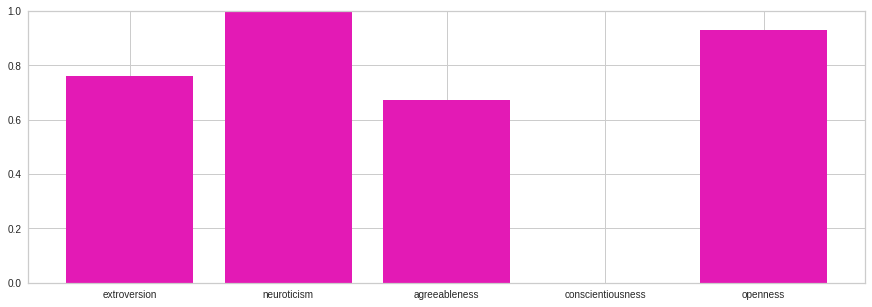

Typ #02


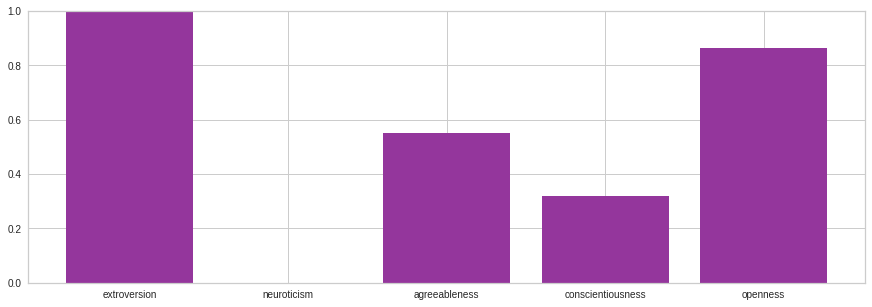

Typ #03 


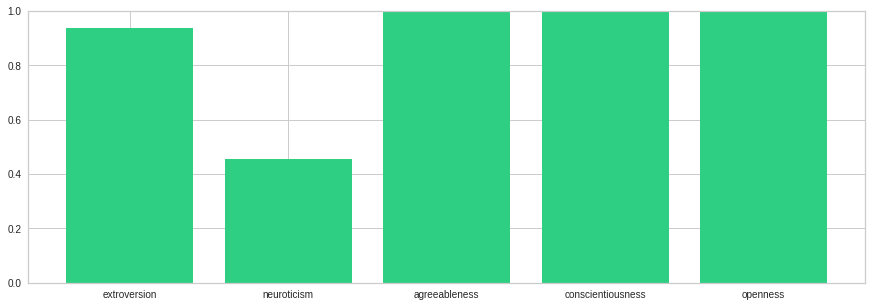

Typ #04


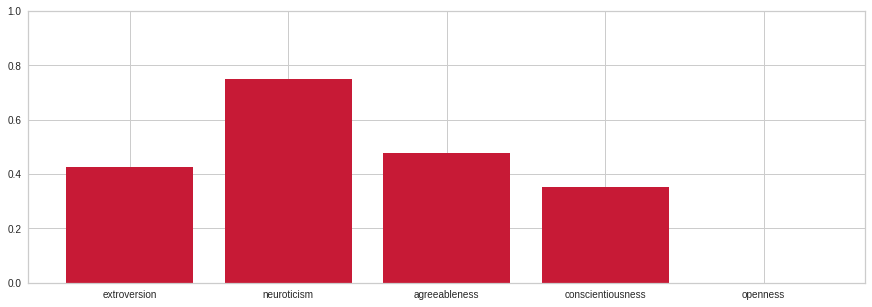

Typ #05


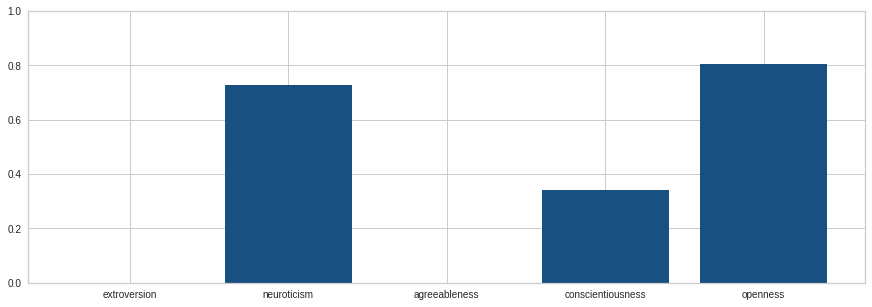

In [ ]:
#1
print('Typ #01' )
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['a'].keys()), normalized_all_types_scores['a'].values(), color=(.89, .1, .71))
plt.show()

#2
print('Typ #02')
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['b'].keys()), normalized_all_types_scores['b'].values(), color=(.58, .21, .61))
plt.show()

#3
print('Typ #03 ')
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['c'].keys()), normalized_all_types_scores['c'].values(), color=(.18, .81, .51))
plt.show()

#4
print('Typ #04')
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['d'].keys()), normalized_all_types_scores['d'].values(), color=(.78, .1, .21))
plt.show()

#5
print('Typ #05' )
plt.figure(figsize=(15,5))
plt.ylim(0, 1)
plt.bar(list(normalized_all_types_scores['e'].keys()), normalized_all_types_scores['e'].values(), color=(.1, .31, .51))
plt.show()

In [ ]:
dt3 

,race,age,engnat,gender,hand,source,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,cluster
0,3,53,1,1,1,1,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5,2
1,13,46,1,2,1,1,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2,3
2,1,14,2,2,1,1,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5,0
3,3,19,2,2,1,1,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5,0
4,11,25,2,2,1,2,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19714,11,15,1,2,1,2,1,4,3,5,4,3,1,2,1,5,5,3,5,3,4,5,4,4,4,4,5,5,1,5,1,5,1,1,5,5,3,2,5,3,3,3,4,3,4,4,1,3,5,3,4,1,4,2,5,3,3
19715,3,37,1,2,1,2,2,3,2,3,2,3,2,4,4,4,2,4,2,4,3,2,2,2,2,2,2,3,2,4,2,4,2,3,3,3,3,3,4,2,2,4,4,2,3,3,1,2,3,2,3,3,4,2,3,3,3
19716,5,16,2,1,1,2,2,5,4,5,5,5,1,2,1,5,5,1,5,1,5,5,5,5,5,5,4,3,5,2,5,5,2,4,1,3,2,5,5,5,4,5,1,4,1,5,5,3,1,3,4,1,1,5,5,5,4
19717,12,16,1,1,1,5,1,4,2,3,2,4,1,3,4,5,4,3,5,2,4,4,4,4,4,4,3,3,2,4,2,4,2,5,4,3,5,3,5,2,4,2,5,1,3,5,3,2,5,3,4,1,5,3,5,5,4


In [ ]:
dt3.to_csv('clustered_data.csv')